# Data Analysis Project: [E-Commerce Public Dataset]
- **Name:** [Rudianto]
- **Email:** [rudrud1899@gmail.com]
- **ID Coding:** [rudrud]

## Defining Business Questions

- How's the order_ratio on our payment type that customer used to pay? 
- Which products do customers purchase using a credit card with the highest number of installments? List the top 5 products.

Make sure order_status is being marked as 'delivered'

## Import All Packages/Libraries Used

In [146]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [147]:
conn = duckdb.connect()
conn.sql('INSTALL spatial')
conn.sql('LOAD spatial')

product_df = conn.execute('''SELECT item_dataset.*,  product_category_name, order_approved_at, order_status FROM './datasets/olist_order_items_dataset.csv' as item_dataset
                          LEFT JOIN './datasets/olist_products_dataset.csv' as product_dataset
                          ON product_dataset.product_id = item_dataset.product_id
                          LEFT JOIN './datasets/olist_orders_dataset.csv' as order_dataset
                          ON order_dataset.order_id = item_dataset.order_id
           ''').fetchdf()

product_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,order_approved_at,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 09:45:35,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 11:05:13,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,2018-01-14 14:48:30,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,2018-08-08 10:10:18,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,2017-02-04 14:10:13,delivered
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,2017-05-17 03:55:27,delivered
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,2017-12-10 12:10:31,delivered
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,2018-07-05 16:35:48,delivered
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,2018-03-20 18:35:21,delivered
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,2018-07-02 14:10:56,delivered


### Assessing & Cleaning Data

In [148]:
#Asessing Data

#Cleaning Data
product_df.dropna()
product_df.drop_duplicates()

product_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,order_approved_at,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 09:45:35,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 11:05:13,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,2018-01-14 14:48:30,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,2018-08-08 10:10:18,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,2017-02-04 14:10:13,delivered


## Exploratory Data Analysis (EDA)

In [149]:
payment_type_result = conn.execute('''
                         SELECT payment_type, 
                         count(product_df.order_id) as total_order, 
                         sum(cast (payment_value as decimal)) as total_payment,
                         round((count(product_df.order_id) / sum(count(product_df.order_id)) over ()) * 100,0)  as order_ratio,
                         round((sum(payment_value) / sum(sum(payment_value)) over ()) * 100,0) as payment_value_ratio
                         FROM './datasets/olist_order_payments_dataset.csv' as payment_dataset
                         INNER JOIN product_df 
                         ON product_df.order_id = payment_dataset.order_id
                         WHERE order_status like '%delivered%'
                         GROUP BY payment_type
                         ORDER BY count(product_df.order_id) DESC
                      ''').fetchdf()

payment_type_result

,payment_type,total_order,total_payment,order_ratio,payment_value_ratio
0,credit_card,84896,15190241.73,74.0,77.0
1,boleto,22362,3943080.78,19.0,20.0
2,voucher,6123,396110.42,5.0,2.0
3,debit_card,1654,246727.51,1.0,1.0


In [150]:
payment_result_most_installments = conn.execute('''
             -- finding most using payment_installments
             With most_payment_installments as ( 
             SELECT payment_installments, sum(payment_value) as total_payment
             FROM './datasets/olist_order_payments_dataset.csv'
             WHERE  payment_type  like '%credit_card%'
             group by payment_installments
             order by total_payment desc limit 1),
             
             -- getting product based in  most_payment_installments to find product_category_name
             order_output as (
               SELECT * FROM './datasets/olist_order_payments_dataset.csv' as payment_installments_dataset
               WHERE  payment_type  like '%credit_card%' and payment_installments = (select payment_installments from most_payment_installments) 
             ),
             
             -- getting product name based on order_id
             product_category_output as (
               select payment_installments, product_df.product_category_name, count(order_output.order_id) as total_order, sum(payment_value) as total_payment from order_output
               INNER JOIN product_df ON order_output.order_id = product_df.order_id
              WHERE order_status like '%delivered%'
               group by payment_installments , product_df.product_category_name
               order by total_payment desc limit 5
             )
             
             select * from product_category_output
             order by total_order desc
             ''').fetchdf()

payment_result_most_installments

,payment_installments,product_category_name,total_order,total_payment
0,1,esporte_lazer,2609,276573.95
1,1,informatica_acessorios,2323,288676.49
2,1,beleza_saude,2000,210824.52
3,1,moveis_decoracao,1823,215420.88
4,1,cama_mesa_banho,1797,202035.97


In [151]:
payment_result_most_installments_yearly = conn.execute('''
             -- finding most using payment_installments
             With most_payment_installments_yearly as ( 
             SELECT payment_installments, sum(payment_value) as total_payment
             FROM './datasets/olist_order_payments_dataset.csv'
             WHERE  payment_type  like '%credit_card%'
             group by payment_installments
             order by total_payment desc limit 1),
             
             -- getting product based in  most_payment_installments_yearly to find product_category_name
             order_output as (
               SELECT * FROM './datasets/olist_order_payments_dataset.csv' as payment_installments_dataset
               WHERE  payment_type  like '%credit_card%' and payment_installments = (select payment_installments from most_payment_installments_yearly) 
             ),
             
             -- getting product name based on order_id
             product_category_output as (
               select 
               payment_installments, 
               extract(month from order_approved_at) as monthly_order_approved_at,
               product_df.product_category_name,
               count(order_output.order_id) as total_order, 
               sum(payment_value) as total_payment 
               from order_output
               INNER JOIN product_df ON order_output.order_id = product_df.order_id
              WHERE order_status like '%delivered%'
               group by payment_installments , monthly_order_approved_at,  product_df.product_category_name
               order by total_payment desc limit 5
             )
             
             select * from product_category_output
             order by monthly_order_approved_at asc
             ''').fetchdf()

payment_result_most_installments_yearly

,payment_installments,monthly_order_approved_at,product_category_name,total_order,total_payment
0,1,1,informatica_acessorios,227,39018.91
1,1,2,informatica_acessorios,343,37257.28
2,1,3,moveis_decoracao,248,39993.07
3,1,4,esporte_lazer,272,33251.60
4,1,10,telefonia_fixa,9,109368.69


## Visualization & Explanatory Analysis

### Question 1:

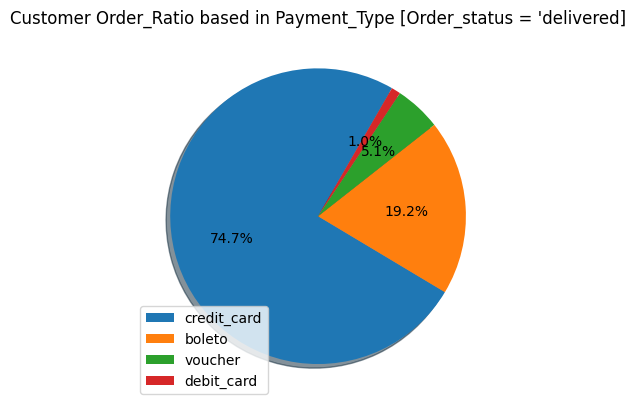

In [152]:
plt.pie(
  x= payment_type_result['order_ratio'],
  shadow=True,
  startangle=60,
  autopct='%1.1f%%',
)

plt.legend(payment_type_result['payment_type'], loc='lower left')
plt.title("Customer Order_Ratio based in Payment_Type [Order_status = 'delivered]")
plt.show()

### Question 2:

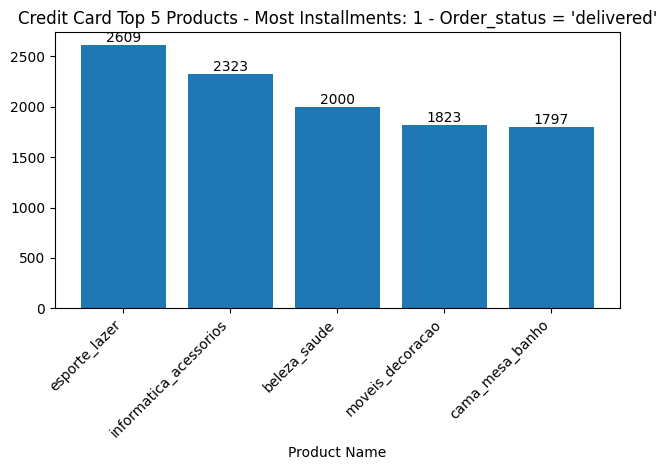

In [153]:
plt.bar(x=payment_result_most_installments['product_category_name'],height=payment_result_most_installments['total_order'])
plt.xlabel("Product Name")
plt.title(f"Credit Card Top 5 Products - Most Installments: {payment_result_most_installments['payment_installments'][0]} - Order_status = 'delivered'")

# Add labels on top of the bars
for i, value in enumerate(payment_result_most_installments['total_order']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')  # Adjust the label position slightly above the bar

plt.xticks(rotation=45, ha='right')  # Rotates labels 45 degrees and aligns them to the right
plt.tight_layout()  # This automatically adjusts the padding to fit the labels
plt.show()

## Advanced Analysis (Optional)

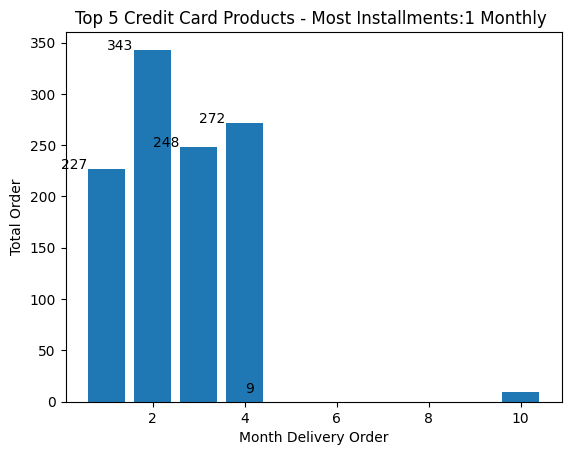

In [154]:
x = payment_result_most_installments_yearly['monthly_order_approved_at']
y = payment_result_most_installments_yearly['total_order']

plt.bar(x,y)
for i, value in enumerate(payment_result_most_installments_yearly['total_order']):
    plt.text(i, value , str(value))  # Adjust the label position slightly above the bar
    
plt.xlabel("Month Delivery Order")
plt.ylabel("Total Order")
plt.title("Top 5 Credit Card Products - Most Installments:1 Monthly ")
plt.show()

## Conclusion

- Based in the result, credit_card is the most order_ratio 74.7%, followed by boleto 19.2%, voucher 5.1% and debit_card 1%
- Chart is showing that Credit Card Top 5 Product with Most Installments:1 are listed below:
1. esporte_lazer = 2609
2. informatica_acessories = 2323
3. beleza_saude = 2000
4. moveis_decoracao = 1823
5. cama_mesa_banho = 1797